# Prettier TEC curves for stations BOAV, KOUG and KOUR

This is a quick script to make  prettier TEC curves than the ones the GOPI software makes using python tools for stations BOAV, KOUG and KOUR since they are the most promising so far talking about detections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import Table

Read and load files

In [2]:
f1 = open("./data/2019-06-22/set5/boav173-2019-06-22.Cmn", "r")
f2 = open("./data/2019-06-22/set5/koug173-2019-06-22.Cmn", "r")
f3 = open("./data/2019-06-22/set5/kour173-2019-06-22.Cmn", "r")

In [3]:
# Skip unwanted rows
for i in range(4):
    f1.readline()
    f2.readline()
    f3.readline()
# start reading file from row 5
data1 = f1.readlines()
data2 = f2.readlines()
data3 = f3.readlines() 

In [4]:
tab1 = Table.read(data1, format="ascii")
tab2 = Table.read(data2, format="ascii")
tab3 = Table.read(data3, format="ascii")
av1 = Table.read("./data/2019-06-22/set5/boav173-2019-06-22.Std", format="ascii")
av2 = Table.read("./data/2019-06-22/set5/koug173-2019-06-22.Std", format="ascii")
av3 = Table.read("./data/2019-06-22/set5/kour173-2019-06-22.Std", format="ascii")

In [5]:
tab1.keys()

['MJdatet', 'Time', 'PRN', 'Az', 'Ele', 'Lat', 'Lon', 'Stec', 'Vtec', 'S4']

Remove datapoints where time is negative

Plot BOAV station data

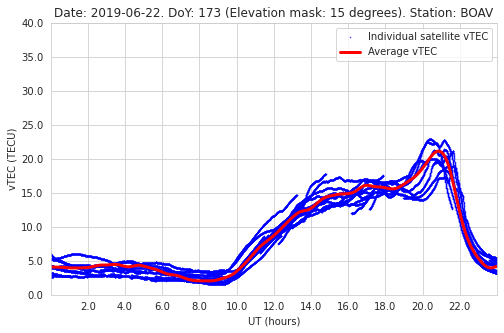

In [34]:
sns.set_style("whitegrid")
time1_mask = tab1["Time"] > 0
time1 = tab1["Time"][time1_mask]
TEC1 = tab1["Vtec"][time1_mask]
PRNs = np.unique(tab1["PRN"])
ele_mask = tab1["Ele"][time1_mask] > 15.
for p in PRNs:
    label = ""
    prn_mask = tab1["PRN"][time1_mask] == p
    if p ==len(PRNs):
        label = "Individual satellite vTEC"
    plt.plot(time1[prn_mask & ele_mask], TEC1[prn_mask & ele_mask], "b.", ms=0.8, label=label)
avlabel = "Average vTEC"
plt.plot(av1["col1"], av1["col2"], "r", lw=3, label=avlabel)
plt.legend()
plt.xlim(0, 24.)
plt.ylim(0, 40)
plt.xlabel("UT (hours)")
plt.ylabel("vTEC (TECU)")
plt.title("Date: 2019-06-22. DoY: 173 (Elevation mask: 15 degrees). Station: BOAV")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0", "22.0"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40], ["0.0", "5.0", "10.0", "15.0", "20.0", "25.0", "30.0", "35.0", "40.0"])
plt.gcf().set_size_inches(8, 5)
plt.savefig("./paper/figures/BOAV-vTEC-curves.pdf")

Plot KOUG data

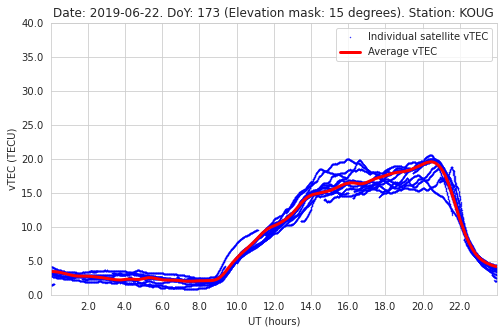

In [40]:
time2_mask = tab2["Time"] > 0
time2 = tab2["Time"][time2_mask]
TEC2 = tab2["Vtec"][time2_mask]
PRNs = np.unique(tab2["PRN"])
ele_mask = tab2["Ele"][time2_mask] > 15.
for p in PRNs:
    label = ""
    prn_mask = tab2["PRN"][time2_mask] == p
    if p ==len(PRNs):
        label = "Individual satellite vTEC"
    plt.plot(time2[prn_mask & ele_mask], TEC2[prn_mask & ele_mask], "b.", ms=0.8, label=label)
avlabel = "Average vTEC"
plt.plot(av2["col1"], av2["col2"], "r", lw=3, label=avlabel)
plt.legend()
plt.xlim(0, 24.)
plt.ylim(0, 40)
plt.xlabel("UT (hours)")
plt.ylabel("vTEC (TECU)")
plt.title("Date: 2019-06-22. DoY: 173 (Elevation mask: 15 degrees). Station: KOUG")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0", "22.0"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40], ["0.0", "5.0", "10.0", "15.0", "20.0", "25.0", "30.0", "35.0", "40.0"])
plt.gcf().set_size_inches(8, 5)
plt.savefig("./paper/figures/KOUG-vTEC-curves.pdf")

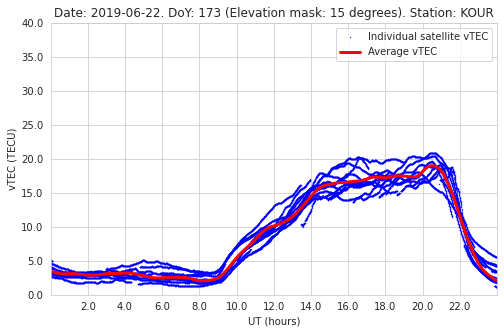

In [42]:
time3_mask = tab3["Time"] > 0
time3 = tab3["Time"][time3_mask]
TEC3 = tab3["Vtec"][time3_mask]
PRNs = np.unique(tab3["PRN"])
ele_mask = tab3["Ele"][time3_mask] > 15.
for p in PRNs:
    label = ""
    prn_mask = tab3["PRN"][time3_mask] == p
    if p ==len(PRNs):
        label = "Individual satellite vTEC"
    plt.plot(time3[prn_mask & ele_mask], TEC3[prn_mask & ele_mask], "b.", ms=0.8, label=label)
avlabel = "Average vTEC"
plt.plot(av3["col1"], av3["col2"], "r", lw=3, label=avlabel)
plt.legend()
plt.xlim(0, 24.)
plt.ylim(0, 40)
plt.xlabel("UT (hours)")
plt.ylabel("vTEC (TECU)")
plt.title("Date: 2019-06-22. DoY: 173 (Elevation mask: 15 degrees). Station: KOUR")
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22], ["2.0", "4.0", "6.0", "8.0", "10.0", "12.0", "14.0", "16.0", "18.0", "20.0", "22.0"])
plt.yticks([0, 5, 10, 15, 20, 25, 30, 35, 40], ["0.0", "5.0", "10.0", "15.0", "20.0", "25.0", "30.0", "35.0", "40.0"])
plt.gcf().set_size_inches(8, 5)
plt.savefig("./paper/figures/KOUR-vTEC-curves.pdf")